In [50]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

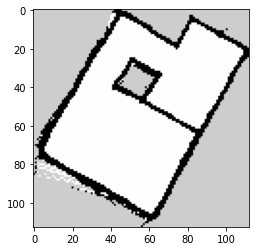

In [51]:
img = cv.imread('turtle_map.pgm')
plt.imshow(img)
plt.show()

[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -7.1320549e-30
  -7.1320549e-30 -7.1320549e-30]
 ...
 [-7.4459130e-29 -7.4459130e-29 -1.8086585e-27 ... -3.2311743e-28
  -1.4504741e-24 -1.4504741e-24]
 [-7.4459130e-29 -7.4459130e-29 -1.8086585e-27 ... -3.2311743e-28
  -1.4504741e-24 -1.4504741e-24]
 [-7.4459130e-29 -7.4459130e-29 -1.8086585e-27 ... -3.2311743e-28
  -1.4504741e-24 -1.4504741e-24]]
12656
image:  37968


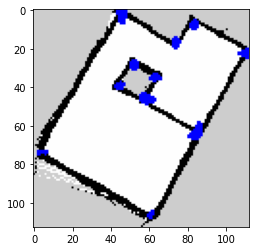

In [137]:

# filename = 'map_example.png'
# img = cv.imread('example_2.png')
img = cv.imread('turtle_map.pgm')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
kernel = np.ones((5,5),np.float32)/49
# gray = cv.filter2D(gray,-1,kernel)
# gray = cv.blur(gray,(7,7))

gray = cv.bilateralFilter(gray,9,75,75)
# gray = cv.medianBlur(gray,5)


dst = cv.cornerHarris(gray,10,3,0.1)  # 0.04
print(dst)
print(f"{dst.size}")
# dst_norm = np.empty(dst.shape, dtype=np.float32)
# cv.normalize(dst, dst_norm, alpha=0, beta=255, norm_type=cv.NORM_MINMAX)
# dst_norm_scaled = cv.convertScaleAbs(dst_norm)
# # Drawing a circle around corners
# for i in range(dst_norm.shape[0]):
#     for j in range(dst_norm.shape[1]):
#         if int(dst_norm[i,j]) > 0:
#             cv.circle(dst_norm_scaled, (j,i), 5, (0), 2)


img[dst>0.4*dst.max()] = [255,0,0]  # before it was 0.2  (255,0,0) for blue dots
print("image: ", img.size)


#result is dilated for marking the corners, not important
# dst = cv.dilate(dst,None)


new = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(new)
plt.show()

# cv.imshow('dst',img)
# if cv.waitKey(0) & 0xff == 27:
#     cv.destroyAllWindows()

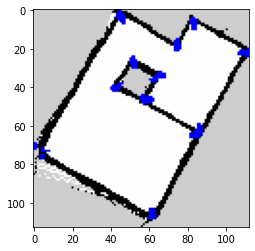

[  0   0   1   1   2   2   2   2   3   3   3   3   3   4   4   4   4   4
   4   4   5   5   5   5   5   5   5   5   6   6   6   6   6   6   6   7
   7   7   7   7   7   8   8   8   9   9   9  10  10  10  15  15  16  16
  16  17  17  17  18  18  18  18  19  19  19  19  20  20  20  20  20  21
  21  21  21  21  21  21  21  22  22  22  22  22  22  23  23  23  23  23
  23  24  24  24  24  25  25  25  26  26  26  26  27  27  27  27  28  28
  28  28  29  29  29  30  30  30  32  32  33  33  33  33  33  34  34  34
  34  34  34  35  35  35  35  35  35  35  36  36  36  36  36  37  37  37
  38  38  38  39  39  39  39  39  40  40  40  40  40  40  41  41  41  41
  41  42  42  42  44  44  45  45  45  45  45  45  45  46  46  46  46  46
  46  46  46  47  47  47  47  47  47  47  48  48  48  48  48  48  49  59
  59  60  60  60  61  61  61  62  62  62  62  63  63  63  63  63  64  64
  64  64  64  64  64  65  65  65  65  65  65  66  66  66  66  66  69  69
  70  70  71  71  71  72  72  72  72  73  73  73  7

In [150]:

# filename = 'map_example.png'
# img = cv.imread('example_2.png')
img = cv.imread('turtle_map.pgm')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
kernel = np.ones((5,5),np.float32)/49
# gray = cv.filter2D(gray,-1,kernel)
# gray = cv.blur(gray,(7,7))

gray = cv.bilateralFilter(gray,9,75,75)
# gray = cv.medianBlur(gray,5)


dst = cv.cornerHarris(gray,6,3,0.1)  # 0.04
#print(f"{dst.size}")

X, Y = np.nonzero(dst>0.2*dst.max())


# def filter_x_y(X,Y):
#     new = []
#     for i, point in enumerate(zip(X,Y)):
#         for j in range(1, len(X) + 1):
#             next = list(zip(X,Y))[j]
#             print(point)
#             print(next)
#             dist = np.linalg.norm(point, next)
#             if dist >= 0.1:
#                 new.append(point)
#     new_X = new[:][0]
#     new_Y = new[:][1]
#     return new_X, new_Y



# points = np.array([[x, y] for x, y in zip(X,Y)], dtype=np.float32)
# criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
# centers = cv.kmeans(points, 13, None, criteria, 20, cv.KMEANS_RANDOM_CENTERS)[2]
# centers = np.uint8(centers)
# X,Y = filter_x_y(X,Y)
img[X,Y] = [255, 0,0]

# #print(centers[0])
# #print(centers.shape)
# print(centers[0][0])

# img[centers[:,0], centers[:,1]] = [255,0,0]  # before it was 0.2  (255,0,0) for blue dots
#print("image: ", img.size)


#result is dilated for marking the corners, not important
# dst = cv.dilate(dst,None)


new = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(new)
plt.show()

# cv.imshow('dst',img)
# if cv.waitKey(0) & 0xff == 27:
#     cv.destroyAllWindows()
print(X, Y)

12656
image:  37968


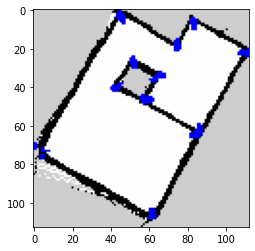

In [148]:

# filename = 'map_example.png'
# img = cv.imread('example_2.png')
img = cv.imread('turtle_map.pgm')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
kernel = np.ones((5,5),np.float32)/49
# gray = cv.filter2D(gray,-1,kernel)
# gray = cv.blur(gray,(7,7))

gray = cv.bilateralFilter(gray,9,75,75)
# gray = cv.medianBlur(gray,5)


dst = cv.cornerHarris(gray,6,3,0.1)  # 0.04
print(f"{dst.size}")
# dst_norm = np.empty(dst.shape, dtype=np.float32)
# cv.normalize(dst, dst_norm, alpha=0, beta=255, norm_type=cv.NORM_MINMAX)
# dst_norm_scaled = cv.convertScaleAbs(dst_norm)
# # Drawing a circle around corners
# for i in range(dst_norm.shape[0]):
#     for j in range(dst_norm.shape[1]):
#         if int(dst_norm[i,j]) > 0:
#             cv.circle(dst_norm_scaled, (j,i), 5, (0), 2)


img[dst>0.2*dst.max()] = [255,0,0]  # before it was 0.2  (255,0,0) for blue dots
print("image: ", img.size)


#result is dilated for marking the corners, not important
dst = cv.dilate(dst,None)


new = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(new)
plt.show()